## APPLIED MACHINE LEARNING AND BIG DATA STRATEGY
## OIM7508-B
## UB NUMBER:20020163

In [1]:
import pandas as pd
import numpy as np


### Dataset: Enerdata_Energy_Statistical_Yearbook_2020.
### data source: https://yearbook.enerdata.net/.
### To import the required sheets to data frame

In [2]:

df_energy_production=pd.read_excel(r'Enerdata_Energy_Statistical_Yearbook_2020.xlsx', sheet_name='Total energy production', skipfooter=3,header=2)#imports sheets, drop footers and set header to the years row
df_energy_consumption=pd.read_excel(r'Enerdata_Energy_Statistical_Yearbook_2020.xlsx', sheet_name='Total energy consumption', skipfooter=3,header=2)
df_CO2_emissions=pd.read_excel(r'Enerdata_Energy_Statistical_Yearbook_2020.xlsx', sheet_name='CO2 emissions from fuel combus', skipfooter=3,header=2)
df_Coal_production=pd.read_excel(r'Enerdata_Energy_Statistical_Yearbook_2020.xlsx', sheet_name='Coal and lignite production', skipfooter=3,header=2)

In [3]:
df_CO2_emissions.tail()#shows bottom 5 rows and shows that footers have been removed

,Unnamed: 0,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2018 - 2019 (%),2000 - 2019 (%/year)
53,Middle-East,589.498189,604.227368,676.379868,726.658204,796.367733,813.831942,846.418608,894.191998,893.149041,...,1735.578086,1774.589846,1849.638636,1875.282665,1887.857338,1920.255414,1946.963672,1979.891983,1.691265,3.875669
54,Iran,181.228526,200.803490,218.167642,219.626366,248.786893,254.724637,262.141330,276.533271,280.076120,...,535.860864,553.839051,584.637672,579.021050,582.316580,602.097136,626.261419,637.762417,1.836453,3.695879
55,Kuwait,28.069693,7.821304,22.497519,28.799920,33.368277,33.324200,32.417537,33.541111,39.708277,...,79.771157,87.702144,83.823908,93.250051,94.757616,90.927690,91.882193,94.422522,2.764768,3.731235
56,Saudi Arabia,155.687005,162.059007,176.778949,187.359112,199.488192,198.636313,211.515242,213.994023,228.896374,...,481.688470,488.560368,524.265172,550.705327,546.256938,551.461440,529.773077,534.333721,0.860868,4.208398
57,United Arab Emirates,52.150121,59.462074,56.910177,59.993600,65.881660,69.972288,73.064977,77.021172,78.857991,...,170.551535,178.864742,178.759272,188.976590,194.591918,199.052098,199.197960,199.268419,0.035372,4.898896


###  To drop the last 2 columns which contain some calculated data not required for my analysis

In [4]:
df_energy_production.drop(['2018 - 2019 (%) ','2000 - 2019 (%/year) '], axis=1, inplace=True)
df_energy_consumption.drop(['2018 - 2019 (%) ','2000 - 2019 (%/year) '], axis=1, inplace=True)
df_CO2_emissions.drop(['2018 - 2019 (%) ','2000 - 2019 (%/year) '], axis=1, inplace=True)
df_Coal_production.drop(['2018 - 2019 (%) ','2000 - 2019 (%/year) '], axis=1, inplace=True)


In [5]:
df_CO2_emissions.head()#shows bottom 5 rows and shows that footers have been removed

,Unnamed: 0,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,World,20311.146371,20444.847349,20382.178694,20486.144277,20584.685585,21062.967784,21525.505513,21895.660159,22054.457811,...,29918.045382,30699.383839,31184.105703,31748.247811,31811.250852,31758.861092,31703.551307,32099.215396,32805.028781,32741.422649
1,OECD,11179.024407,11204.065599,11259.264336,11356.243430,11544.211367,11701.524689,12079.500945,12342.803048,12354.688868,...,12615.659439,12391.518155,12251.565896,12269.570921,12076.441663,11983.466006,11914.347914,11891.289289,11960.862502,11633.646552
2,G7,8608.075975,8574.367610,8617.615186,8680.810885,8792.446518,8888.785674,9143.238568,9353.979342,9393.237215,...,9122.185444,8888.737113,8768.140358,8863.662897,8741.947655,8569.594914,8437.824768,8330.203276,8410.330399,8172.699104
3,BRICS,5413.964131,5570.075817,5522.855026,5570.074607,5529.515933,5762.576254,5804.049158,5805.219716,5936.004276,...,11797.701535,12642.645274,13073.320839,13519.782857,13630.519954,13590.705031,13519.608856,13840.175605,14291.595767,14562.449210
4,Europe,4400.640547,4374.983962,4253.042155,4173.503624,4129.467766,4192.709065,4333.823098,4261.435000,4272.323855,...,4175.912598,4058.039216,4028.628631,3933.855017,3761.573397,3824.218250,3833.371665,3884.494810,3823.498968,3672.906813


In [6]:
df_CO2_emissions.columns.values# to show the columns represented as years covered 1990 - 2019

array(['Unnamed: 0', 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=object)

In [7]:
df_CO2_emissions.index.values# to show the index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57], dtype=int64)

In [8]:
df_CO2_emissions.shape#to show the shape of the data frame

(58, 31)

In [9]:
df_CO2_emissions.describe()# to get a statistical description of the dataframe

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,...,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,1630.493317,1640.079456,1638.977149,1649.189189,1660.970696,1695.775819,1736.617299,1767.580417,1780.563305,1789.934162,...,2278.997220,2320.668710,2345.184743,2384.625930,2381.654482,2370.599054,2359.108745,2380.312473,2426.096276,2413.743119
std,3412.304195,3427.394311,3426.552994,3453.618930,3484.493574,3557.997696,3646.229901,3720.563029,3745.072660,3766.043949,...,4910.717506,5042.201852,5115.555139,5223.495811,5229.111937,5212.274459,5196.040421,5260.171588,5380.670575,5379.533662
min,21.618930,7.821304,22.497519,23.430271,23.975755,24.514905,25.919622,28.273102,27.397193,29.000790,...,30.094879,29.378250,31.111826,31.163029,32.073105,31.682957,31.231725,32.744887,32.386076,32.765826
25%,102.473738,107.032200,109.188148,109.034055,113.641601,114.965840,120.326960,117.143205,119.182117,112.112217,...,172.420511,164.670551,172.102242,176.093635,170.949244,178.871168,179.762630,174.343672,168.531797,170.520301
50%,247.720776,255.282068,257.919267,261.640459,266.449940,279.563375,289.712128,301.587030,311.946591,307.402971,...,385.556996,395.201177,409.860998,403.571907,394.788441,391.784517,384.856586,389.425945,389.104570,386.133149
75%,929.249670,922.706407,899.343182,912.700649,948.527661,967.812653,1020.535500,1056.533030,1027.327126,1061.668329,...,1575.395894,1642.852833,1653.531408,1656.401219,1666.258301,1660.018913,1636.090582,1622.838702,1687.305843,1699.783375
max,20311.146371,20444.847349,20382.178694,20486.144277,20584.685585,21062.967784,21525.505513,21895.660159,22054.457811,22193.164770,...,29918.045382,30699.383839,31184.105703,31748.247811,31811.250852,31758.861092,31703.551307,32099.215396,32805.028781,32741.422649


### Converting colums to strings which is useful for plotting

In [10]:

df_CO2_emissions.columns = list(map(str, df_CO2_emissions.columns))#print (type(x)) for x in df_CO2_emissions.columns.values] 
df_energy_production.columns = list(map(str, df_energy_production.columns))
df_energy_consumption.columns = list(map(str, df_energy_consumption.columns))
df_Coal_production.columns = list(map(str, df_Coal_production.columns))

### Create a list of years from 1990 to 2019 for plotting

In [11]:
years = list(map(str, range(1990, 2020)))# used later for plotting
years

['1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019']

### Creating Slices from Dataframe to enable plotting of timeseries for UK and World respectively

In [12]:
UK_CO2_Emissions=df_CO2_emissions.loc[17,years]#slice index 17 where UK data is located in the dataframe
World_CO2_Emissions=df_CO2_emissions.loc[0,years]#slice index 0 where World data is located in the dataframe
UK_Energy_Production=df_energy_production.loc[17,years]
World_Energy_Production=df_energy_production.loc[0,years]
UK_Energy_Consumption=df_energy_consumption.loc[17,years]
World_Energy_Consumption=df_energy_consumption.loc[0,years]
UK_Coal_production=df_Coal_production.loc[17,years]
UK_Energy_Production.head()


1990    208.009135
1991    214.745205
1992    214.968277
1993    223.411152
1994    244.619609
Name: 17, dtype: object

### Define a function called 'stat' to print statistics of dataframe

In [13]:
def stat(a):
    print('max is', a.max())
    print('min is' , a.min())
    print('mean is' , a.mean())
    print('median is' , a.median())
    print('Standard deviation is' , a.std())
    print('skewness is' , a.skew())
    print('Kurtosis is' , a.kurtosis())

In [14]:
stat(UK_CO2_Emissions)

max is 564.0565994159999
min is 345.64262473
mean is 493.5988850073333
median is 524.7253408765
Standard deviation is 66.46340451070753
skewness is -1.0676754559075246
Kurtosis is -0.2040498468579548


In [15]:
stat(UK_Energy_Production)

max is 281.578364121
min is 107.934137127
mean is 194.38416904936668
median is 206.66269620100002
Standard deviation is 61.114033040603864
skewness is -0.08761031423000924
Kurtosis is -1.5796067777425444


In [16]:
stat(UK_Energy_Consumption)

max is 225.937144194
min is 170.816927668
mean is 206.00636803433332
median is 212.84322147
Standard deviation is 17.812709930402953
skewness is -0.7177444522854072
Kurtosis is -0.975432960741804


In [17]:
stat(UK_Coal_production)

max is 94.922
min is 2.166637021
mean is 31.91437332226667
median is 22.797
Standard deviation is 25.91847218044153
skewness is 1.1650769059034212
Kurtosis is 0.7086488591099154


In [18]:
stat(World_CO2_Emissions)

max is 32805.028780625
min is 20311.146370955
mean is 26220.645526364697
median is 26165.8649981365
Standard deviation is 4611.647562281361
skewness is 0.08508071913749453
Kurtosis is -1.660551546108422


In [19]:
stat(World_Energy_Production)

max is 14715.376056942
min is 8794.073541845999
mean is 11380.005524025768
median is 11359.067199312
Standard deviation is 1973.4428280793977
skewness is 0.164075872155982
Kurtosis is -1.4638310414353901


In [20]:
stat(World_Energy_Consumption)

max is 14378.244170708
min is 8756.404905492
mean is 11337.48290245463
median is 11318.6488306475
Standard deviation is 1938.561594555461
skewness is 0.11080617673200782
Kurtosis is -1.537045505611663


In [21]:
#testing_merge=df_CO2_emissions.loc[17,years],df_CO2_emissions.loc[0]

### Import matplotlib library for plotting of charts

In [22]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [23]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### Plot different charts

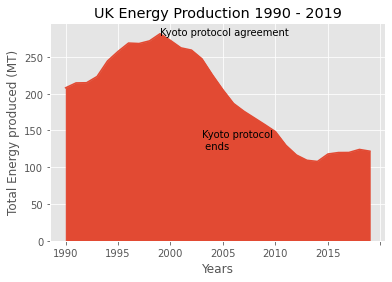

In [24]:
UK_Energy_Production.plot(kind='area')#plot area chart for UK energy production
plt.title('UK Energy Production 1990 - 2019')
plt.ylabel('Total Energy produced (MT)')
plt.xlabel('Years')

plt.text(9,280, 'Kyoto protocol agreement')
plt.text(13,125, 'Kyoto protocol\n ends')

plt.show()

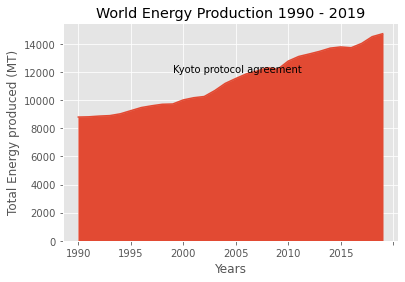

In [25]:
World_Energy_Production.plot(kind='area')#plot area chart for World energy production
plt.title('World Energy Production 1990 - 2019')
plt.ylabel('Total Energy produced (MT)')
plt.xlabel('Years')

plt.text(9,12000, 'Kyoto protocol agreement')


plt.show()

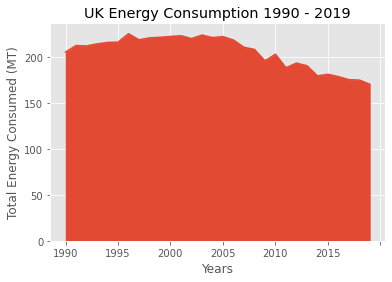

In [26]:
UK_Energy_Consumption.plot(kind='area')#plot area chart for UK energy consumption
plt.title('UK Energy Consumption 1990 - 2019')
plt.ylabel('Total Energy Consumed (MT)')
plt.xlabel('Years')


plt.show()

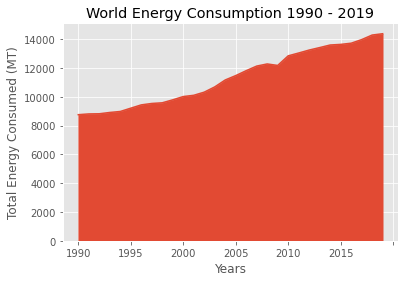

In [27]:
World_Energy_Consumption.plot(kind='area')#plot area chart for World energy consumption
plt.title('World Energy Consumption 1990 - 2019')
plt.ylabel('Total Energy Consumed (MT)')
plt.xlabel('Years')


plt.show()

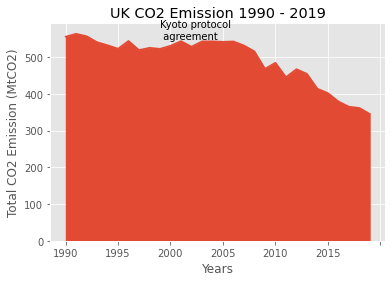

In [28]:
UK_CO2_Emissions.plot(kind='area')#plot area chart for UK CO2 Emission
plt.title('UK CO2 Emission 1990 - 2019')
plt.ylabel('Total CO2 Emission (MtCO2)')
plt.xlabel('Years')

plt.text(9,550, 'Kyoto protocol \n agreement')


plt.show()

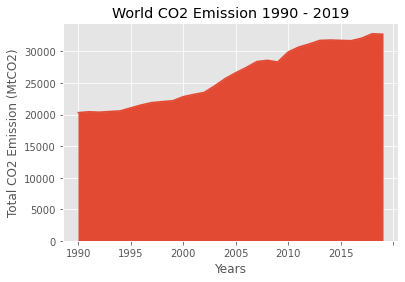

In [29]:
World_CO2_Emissions.plot(kind='area')#plot area chart for World CO2 emissions
plt.title('World CO2 Emission 1990 - 2019')
plt.ylabel('Total CO2 Emission (MtCO2)')
plt.xlabel('Years')



plt.show()

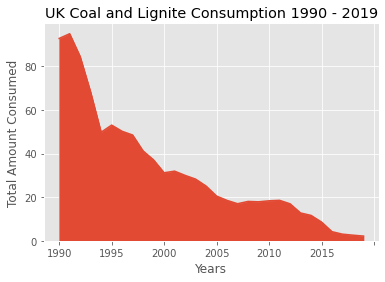

In [30]:
UK_Coal_production.plot(kind='area')#plot area chart for World CO2 emissions
plt.title('UK Coal and Lignite Consumption 1990 - 2019')
plt.ylabel('Total Amount Consumed')
plt.xlabel('Years')



plt.show()

In [31]:
Combined_CO2_Emission=df_CO2_emissions.loc[[17,0],years] #Slicing UK and World CO2 emission combined
Combined_CO2_Emission=Combined_CO2_Emission.T #Transpose to visualize corrrectly
G8_CO2_Emission=df_CO2_emissions.loc[[27,8,9,10,40,17],years] #Slicing G8 countries CO2 emission combined
G8_CO2_Emission.index=['Canada','France','Germany','Italy','Japan','UK']
G8_CO2_Emission.head(9)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Canada,429.731808,422.769602,435.468556,435.144409,451.601311,460.993742,476.160671,492.813675,497.673981,508.969385,...,548.335891,560.717237,562.043427,570.894595,574.289146,577.596591,567.000849,564.665121,572.385960,569.331337
France,365.414828,392.648547,381.527955,362.704451,356.072799,366.555009,380.668689,371.967411,394.979145,389.988887,...,356.582815,338.134509,342.907880,342.569074,310.736358,316.757207,317.774762,322.627553,309.114048,301.787856
Germany,952.762433,936.145059,895.777025,883.962847,869.540324,868.318041,894.325595,863.151594,860.050108,828.432994,...,780.863572,751.887374,767.787439,788.578332,749.726737,754.544815,758.904616,745.508398,719.482756,672.989846
Italy,397.791201,398.515651,397.923129,392.449914,387.889105,410.529467,408.213870,412.043662,422.408697,427.459151,...,401.963194,393.448813,374.843288,343.664687,328.097806,335.927011,333.022500,329.190966,323.544095,317.607048
Japan,1040.207858,1046.997872,1058.216918,1050.273088,1099.083965,1109.366103,1121.785017,1110.646707,1072.053154,1108.951155,...,1103.700350,1160.790776,1204.187268,1210.563790,1171.171170,1135.362410,1127.145880,1111.960808,1082.181561,1045.024965
UK,556.162384,564.056599,557.576113,541.347136,532.900744,523.500047,544.646787,519.795171,525.950635,523.088273,...,485.183906,446.088397,467.770477,455.137851,414.544785,402.523502,379.804672,365.594001,362.092328,345.642625


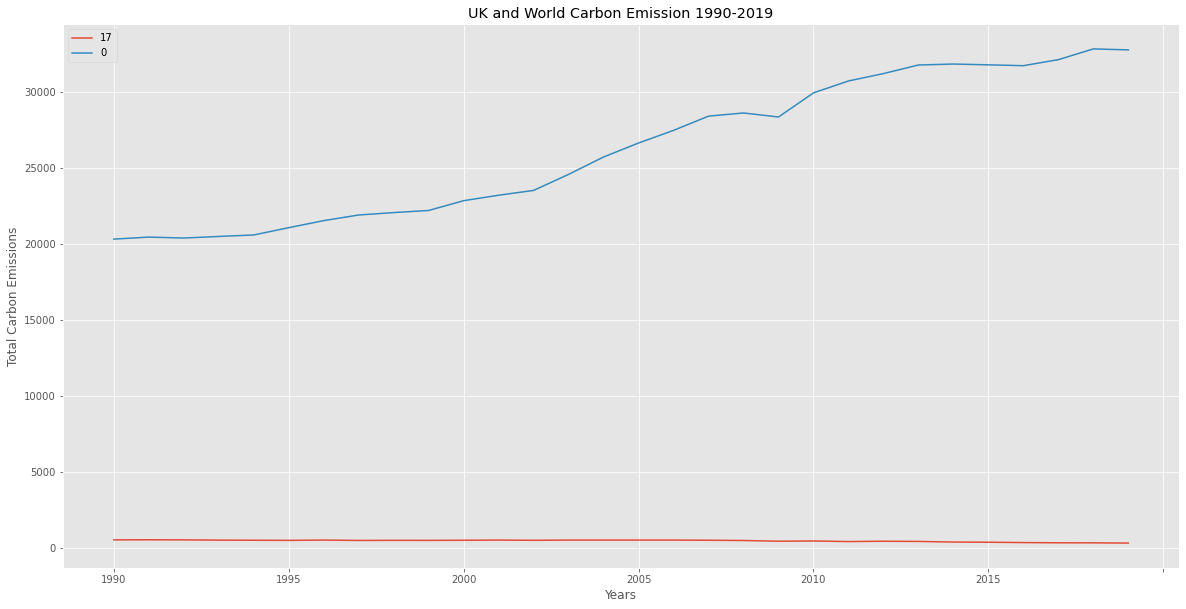

In [32]:
#Combined_CO2_Emission.index=Combined_CO2_Emission.index.map(int)
Combined_CO2_Emission.plot(kind='line',
            stacked=False,
            figsize=(20,10),
            )
plt.title('UK and World Carbon Emission 1990-2019')
plt.ylabel('Total Carbon Emissions')
plt.xlabel('Years')

plt.show()

In [33]:
Combined_CO2_Emission.head()

,17,0
1990,556.162384,20311.146371
1991,564.056599,20444.847349
1992,557.576113,20382.178694
1993,541.347136,20486.144277
1994,532.900744,20584.685585


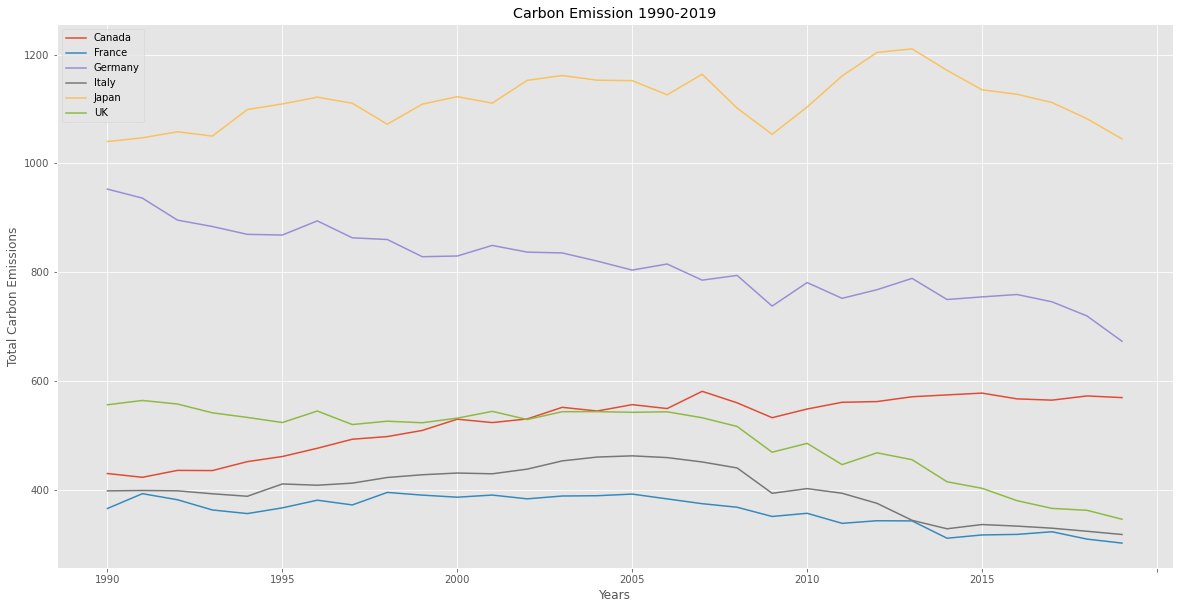

In [34]:
#G8_CO2_Emission.index=G8_CO2_Emission.index.map(int)
G8_CO2_Emission.T.plot(kind='line',
            stacked=False,
            figsize=(20,10),
            )
plt.title('Carbon Emission 1990-2019')
plt.ylabel('Total Carbon Emissions')
plt.xlabel('Years')

plt.show()

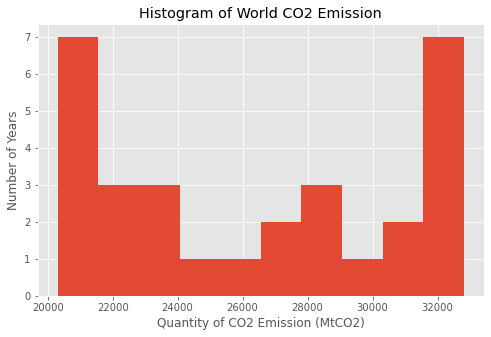

In [35]:
World_CO2_Emissions.plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of World CO2 Emission') # add a title to the histogram
plt.ylabel('Number of Years') # add y-label
plt.xlabel('Quantity of CO2 Emission (MtCO2)') # add x-label

plt.show()

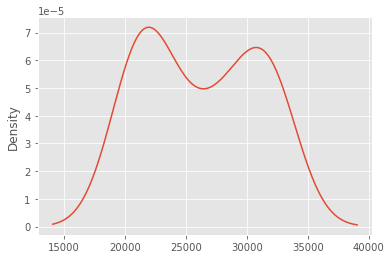

In [36]:
World_CO2_Emissions.plot.kde()



plt.show()

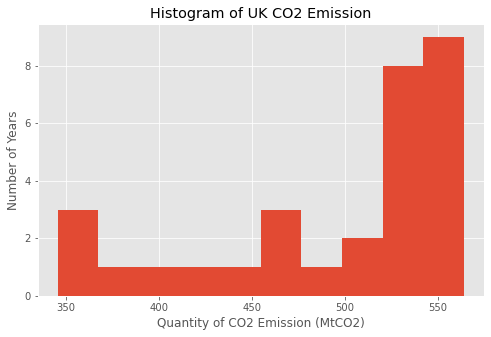

In [37]:
UK_CO2_Emissions.plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of UK CO2 Emission') # add a title to the histogram
plt.ylabel('Number of Years') # add y-label
plt.xlabel('Quantity of CO2 Emission (MtCO2)') # add x-label

plt.show()

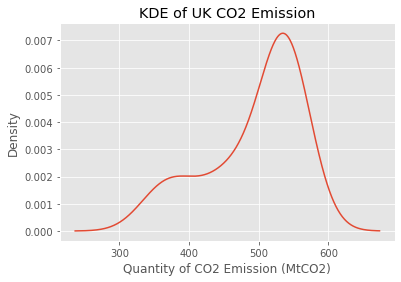

In [38]:
UK_CO2_Emissions.plot.kde()
plt.title('KDE of UK CO2 Emission') # add a title to the KDE
plt.xlabel('Quantity of CO2 Emission (MtCO2)') # add x-label

plt.show()

In [39]:
#plot1=plt.subplots(fig)

### Create a dataframe with uk emission and consumption for plotting

In [40]:
E_C=Combined_CO2_Emission
E_C['UK_Consumptions']=UK_Energy_Consumption[:]# con is uk energy consumption
E_C.rename(columns={17:'UK_Emissions', 0:'World_Emissions',},inplace=True)
#E_C.drop('UK_Consumption',axis=1,inplace=True)
E_C


,UK_Emissions,World_Emissions,UK_Consumptions
1990,556.162384,20311.146371,205.964719
1991,564.056599,20444.847349,213.066388
1992,557.576113,20382.178694,212.620055
1993,541.347136,20486.144277,214.831383
1994,532.900744,20584.685585,216.395008
1995,523.500047,21062.967784,216.777163
1996,544.646787,21525.505513,225.937144
1997,519.795171,21895.660159,219.334734
1998,525.950635,22054.457811,221.442436
1999,523.088273,22193.164770,222.023754


### Plotting a correlation graph

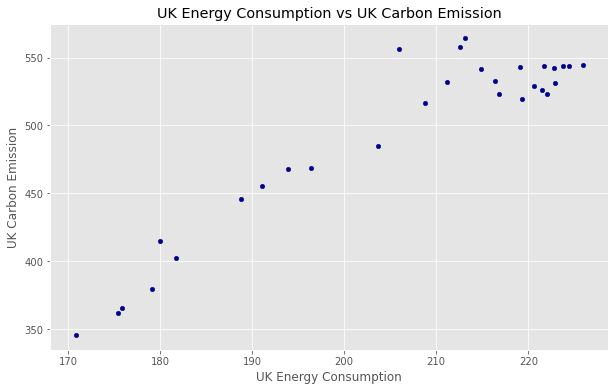

In [41]:
E_C.plot(kind='scatter', x='UK_Consumptions', y='UK_Emissions', figsize=(10, 6), color='darkblue')#plot between consumption and emission

plt.title('UK Energy Consumption vs UK Carbon Emission')
plt.xlabel('UK Energy Consumption')
plt.ylabel('UK Carbon Emission')

plt.show()

In [42]:
E_C[['UK_Emissions','UK_Consumptions']].corr()

,UK_Emissions
UK_Emissions,1.0


In [43]:
df_combined=pd.concat([UK_CO2_Emissions,World_CO2_Emissions,UK_Energy_Production,World_Energy_Production,UK_Energy_Consumption,World_Energy_Consumption,UK_Coal_production], axis=1)
df_combined.reset_index(inplace=True)# resets the index(run once)
# rename columns
df_combined.columns = ['years', 'UK CO2 Emissions (MtCO2)','World CO2 Emissions (MtCO2)','UK Energy Production(MT)','World Energy Production (MT)','UK Energy Consumption (MT)','World Energy Consumption(MT)','UK Coal Consumption(MT)']
df_combined.head()

,years,UK CO2 Emissions (MtCO2),World CO2 Emissions (MtCO2),UK Energy Production(MT),World Energy Production (MT),UK Energy Consumption (MT),World Energy Consumption(MT),UK Coal Consumption(MT)
0,1990,556.162384,20311.146371,208.009135,8794.073542,205.964719,8756.404905,92.762
1,1991,564.056599,20444.847349,214.745205,8812.026778,213.066388,8810.73375,94.922
2,1992,557.576113,20382.178694,214.968277,8863.317253,212.620055,8820.932717,84.493
3,1993,541.347136,20486.144277,223.411152,8896.752968,214.831383,8911.139318,68.199
4,1994,532.900744,20584.685585,244.619609,9023.189828,216.395008,8979.590033,49.785


In [44]:
df_combined.to_csv('mycsv2.csv')

In [45]:
energy_data=pd.read_csv('mycsv2.csv')

In [46]:
energy_data.head()

,Unnamed: 0,years,UK CO2 Emissions (MtCO2),World CO2 Emissions (MtCO2),UK Energy Production(MT),World Energy Production (MT),UK Energy Consumption (MT),World Energy Consumption(MT),UK Coal Consumption(MT)
0,0,1990,556.162384,20311.146371,208.009135,8794.073542,205.964719,8756.404905,92.762
1,1,1991,564.056599,20444.847349,214.745205,8812.026778,213.066388,8810.733750,94.922
2,2,1992,557.576113,20382.178694,214.968277,8863.317253,212.620055,8820.932717,84.493
3,3,1993,541.347136,20486.144277,223.411152,8896.752968,214.831383,8911.139318,68.199
4,4,1994,532.900744,20584.685585,244.619609,9023.189828,216.395008,8979.590033,49.785


### Import seaborn for visualization

In [47]:
%%capture
! pip install seaborn

In [48]:
import seaborn as sns


### Plot world CO2 Emisssion and Energy Consumption Regression

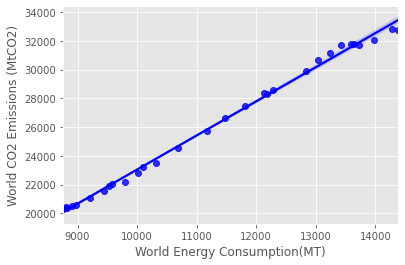

In [49]:
x = sns.regplot(x='World Energy Consumption(MT)', y='World CO2 Emissions (MtCO2)',  data=energy_data, color='blue')

### Correlation of World CO2 Emission and World Energy Consumption

In [50]:
energy_data[['World CO2 Emissions (MtCO2)','World Energy Consumption(MT)']].corr()

,World CO2 Emissions (MtCO2),World Energy Consumption(MT)
World CO2 Emissions (MtCO2),1.000000,0.998183
World Energy Consumption(MT),0.998183,1.000000


### Plot UK CO2 Emisssion and Energy Consumption Regression

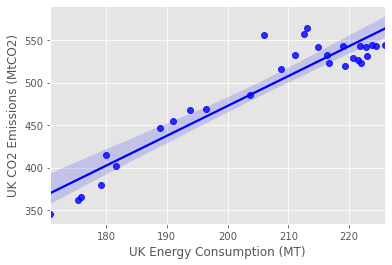

In [51]:
x = sns.regplot( x='UK Energy Consumption (MT)',y='UK CO2 Emissions (MtCO2)', data=energy_data, color='blue')

In [52]:
energy_data[['UK CO2 Emissions (MtCO2)','UK Energy Consumption (MT)']].corr()

,UK CO2 Emissions (MtCO2),UK Energy Consumption (MT)
UK CO2 Emissions (MtCO2),1.00000,0.94059
UK Energy Consumption (MT),0.94059,1.00000


### Plot world CO2 emisssion and Energy production regression

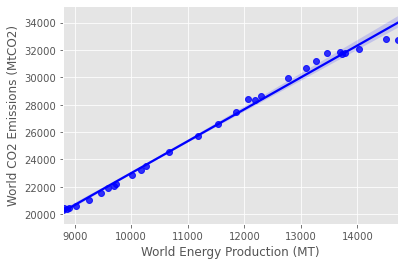

In [53]:
x = sns.regplot(x='World Energy Production (MT)', y='World CO2 Emissions (MtCO2)',  data=energy_data, color='blue')

### Correlation of World CO2 Emission and World Energy Production

In [54]:
energy_data[['World CO2 Emissions (MtCO2)','World Energy Production (MT)']].corr()

,World CO2 Emissions (MtCO2),World Energy Production (MT)
World CO2 Emissions (MtCO2),1.000000,0.996577
World Energy Production (MT),0.996577,1.000000


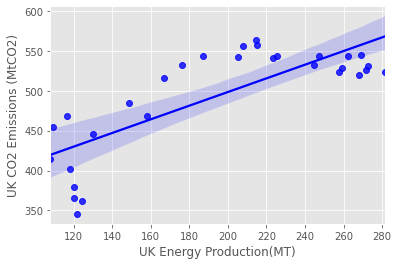

In [55]:
#plot UK CO2 emisssion and Energy Production regression
x = sns.regplot( x='UK Energy Production(MT)',y='UK CO2 Emissions (MtCO2)', data=energy_data, color='blue')

### Correlation of UK CO2 Emission and World Energy Production

In [56]:
energy_data[['UK CO2 Emissions (MtCO2)','UK Energy Production(MT)']].corr()

,UK CO2 Emissions (MtCO2),UK Energy Production(MT)
UK CO2 Emissions (MtCO2),1.000000,0.787067
UK Energy Production(MT),0.787067,1.000000


### Plot World Energy Consumption and Energy Production Regression

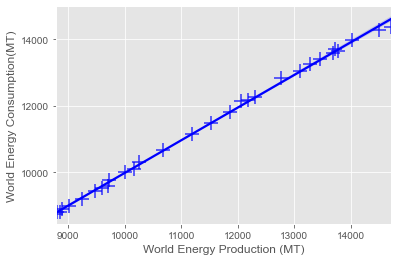

<Figure size 1080x720 with 0 Axes>

In [57]:
x = sns.regplot(x='World Energy Production (MT)', y='World Energy Consumption(MT)',  data=energy_data, color='blue', marker='+', scatter_kws={'s': 200})
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)

### Correlation of World Energy Production ad World Energy Consumption

In [58]:
energy_data[['World Energy Production (MT)','World Energy Consumption(MT)']].corr()

,World Energy Production (MT),World Energy Consumption(MT)
World Energy Production (MT),1.000000,0.999247
World Energy Consumption(MT),0.999247,1.000000


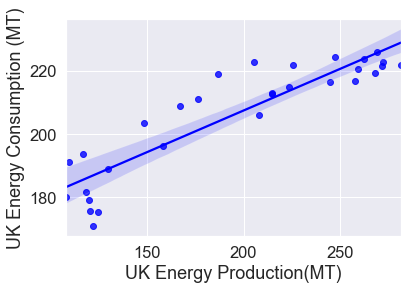

In [59]:
#plot UK Energy Consumption and Energy Production regression


x = sns.regplot( x='UK Energy Production(MT)', y='UK Energy Consumption (MT)', data=energy_data, color='blue')


### Corellation of UK Energy Consumption and UK Energy Production

In [60]:
energy_data[['UK Energy Production(MT)','UK Energy Consumption (MT)']].corr()

,UK Energy Production(MT),UK Energy Consumption (MT)
UK Energy Production(MT),1.000000,0.902554
UK Energy Consumption (MT),0.902554,1.000000


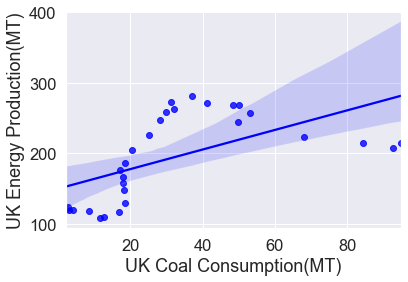

In [61]:
#plot UK Coal Production and Energy Production regression


x = sns.regplot( x='UK Coal Consumption(MT)', y='UK Energy Production(MT)', data=energy_data, color='blue')


In [62]:
energy_data[['UK Coal Consumption(MT)','UK Energy Production(MT)']].corr()

,UK Coal Consumption(MT),UK Energy Production(MT)
UK Coal Consumption(MT),1.000000,0.587922
UK Energy Production(MT),0.587922,1.000000


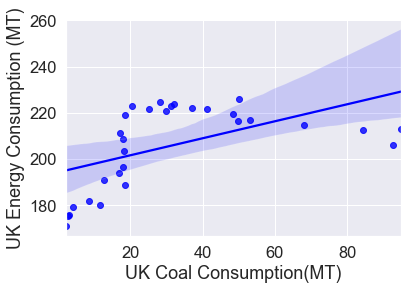

In [63]:
#plot UK Coal Production and Energy Consumption regression


x = sns.regplot( x='UK Coal Consumption(MT)', y='UK Energy Consumption (MT)', data=energy_data, color='blue')


In [64]:
energy_data[['UK Coal Consumption(MT)','UK Energy Consumption (MT)']].corr()

,UK Coal Consumption(MT),UK Energy Consumption (MT)
UK Coal Consumption(MT),1.000000,0.534894
UK Energy Consumption (MT),0.534894,1.000000


<AxesSubplot:label='434396ed-d914-4450-9a22-2f61ecc2e151', xlabel='UK Energy Consumption (MT)', ylabel='Count'>

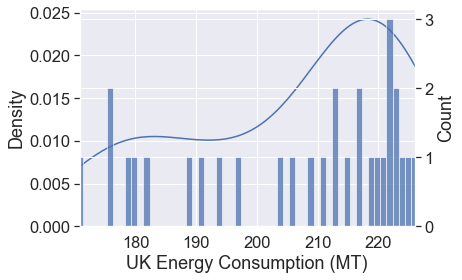

In [65]:
fig, ax1=plt.subplots()
sns.kdeplot(data=energy_data, x='UK Energy Consumption (MT)' , ax=ax1)
ax1.set_xlim((energy_data['UK Energy Consumption (MT)'].min(), energy_data['UK Energy Consumption (MT)'].max()))
ax2=ax1.twinx()
sns.histplot(data=energy_data, x='UK Energy Consumption (MT)', discrete=True, ax=ax2)

 ## To create a linear model

#### Load modules for linear regression

In [66]:
from sklearn.linear_model import LinearRegression

#### To create linear regression objects

In [67]:
lm = LinearRegression()
lm

LinearRegression()

#### Use Energy Consumption as a predictor of CO2 Emission

In [68]:
X1=energy_data[['UK Energy Consumption (MT)']]
Y1=energy_data['UK CO2 Emissions (MtCO2)']


In [69]:
lm.fit(X1,Y1) # to fit the model

LinearRegression()

In [70]:
lm.intercept_ #to get the intercept of the model

-229.39320266529734

In [71]:
lm.coef_ #to get the coefficient of the model

array([3.50956184])

#### MODEL1: UK CO2 Emission= 3.51 x UK Energy Consumption - 229.39

In [72]:
# Find the R^2
print('The R-square is: ', lm.score(X1, Y1))

The R-square is:  0.8847093600864554


#### This means that 88.47% of the variation of CO2 emission is explained by this model

#### Import mean_square_error

In [73]:
from sklearn.metrics import mean_squared_error

In [74]:

Y1hat=lm.predict(X1) # Predicts Y1 values
print('The output of the first four predicted value is: ', Y1hat[0:4]) #Prints first 4 values of Y1 prediction

The output of the first four predicted value is:  [493.45271653 518.37646267 516.81002717 524.57082128]


In [75]:
mse = mean_squared_error(energy_data['UK CO2 Emissions (MtCO2)'], Y1hat)
print('The mean square error of CO2 Emission and predicted value is: ', mse)

The mean square error of CO2 Emission and predicted value is:  492.30694267543316


## Multiple Linear regression Using Energy Consumption and coal & Lignite Consumption

In [76]:
Z=energy_data[['UK Energy Consumption (MT)','UK Coal Consumption(MT)']]

In [77]:
# fit the model 
lm.fit(Z, energy_data['UK CO2 Emissions (MtCO2)'])
# Find the R^2
print('The R-square is: ', lm.score(Z, energy_data['UK CO2 Emissions (MtCO2)']))

The R-square is:  0.9374047804184251


#### This means that 93.74% of the variation of CO2 emission is explained by this model

In [78]:
Y_predict_multifit = lm.predict(Z) # To create predictons
print('The output of the first four predicted value is: ', Y_predict_multifit[0:4]) #Prints first 4 values of Y1 prediction

The output of the first four predicted value is:  [535.86769829 558.44550566 549.85523017 545.0649631 ]


In [79]:
print('The mean square error of UK CO2 emission and predicted value using multifit is: ', \
      mean_squared_error(energy_data['UK CO2 Emissions (MtCO2)'], Y_predict_multifit))

The mean square error of UK CO2 emission and predicted value using multifit is:  267.29022582762326


In [80]:
lm.intercept_ #to get the intercept of the model

-139.9230728489179

In [81]:
lm.coef_ #to get the coefficient of the model

array([2.9673223 , 0.69669765])

#### MODEL2: UK CO2 Emission= 2.97 x UK Energy Consumption + 0.697 x UK Coal production - 139.92

## Multiple Linear regression Using Energy Production and Coal & Lignite Consumption

In [82]:
Z1=energy_data[['UK Energy Production(MT)','UK Coal Consumption(MT)']]

In [83]:
# fit the model 
lm.fit(Z1, energy_data['UK CO2 Emissions (MtCO2)'])
# Find the R^2
print('The R-square is: ', lm.score(Z1, energy_data['UK CO2 Emissions (MtCO2)']))

The R-square is:  0.7033962468738786


In [84]:
Y_predict_multifit = lm.predict(Z1) # To create predictons
print('The output of the first four predicted value is: ', Y_predict_multifit[0:4]) #Prints first 4 values of Y1 prediction

The output of the first four predicted value is:  [558.0204936  564.22751227 554.78997457 545.12002833]


In [85]:
print('The mean square error of UK CO2 emission and predicted value using multifit is: ', \
      mean_squared_error(energy_data['UK CO2 Emissions (MtCO2)'], Y_predict_multifit))

The mean square error of UK CO2 emission and predicted value using multifit is:  1266.5389575170968


In [86]:
lm.intercept_ #to get the intercept of the model

342.4150781292333

In [87]:
lm.coef_ #to get the coefficient of the model

array([0.62698246, 0.91834303])

#### MODEL3: UK CO2 Emission= 0.63 x UK Energy Production + 0.92 x UK Coal Consumption - 342.42

#### Comparing the three models, it is evident that the multiple linear regression model (Model2) is most accurate.
#### It has a higher R squared value nad a lower MSE value.